In [3]:
#imports
#numpy, pandas, scipy, math, mathplotlib
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#cross validation
from sklearn.cross_validation import train_test_split

In [4]:
#data
rawData = pd.read_csv('default of credit card clients1.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,-2,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,2,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689,679,0


In [5]:
#features
features = rawData.iloc[:,1:13]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,-2,0,0,689,0,0,0
1,120000,2,2,2,26,2,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689


In [6]:
#dependent variable
depVar = rawData['default payment next month']

In [7]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [9]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,-2,0,0,689,0,0,0
1,120000,2,2,2,26,2,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,0,19131,2000,36681,10000,9000,689


In [10]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [11]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_6  BILL_AMT6  PAY_AMT1  \
29900      20000    1          2         2   29     -2          0         0   
29901      50000    1          2         2   29      0      49387         0   
29902     170000    1          3         2   30      0     124746    168096   
29903     260000    1          1         1   30     -1     172104     10018   
29904      60000    1          3         2   30      0      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0  
29901      6556      3250      1563      1208  
29902      6409      7335      4448      4519  
29903     13333        99        99    172104  
29904      4553      5800      2000      1000  


In [12]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [14]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [47]:
#Model Fitting
clfpred = clf.predict(X_test)
print(confusion_matrix(y_test, clfpred))
print(classification_report(y_test, clfpred))

[[59 16]
 [17  8]]
             precision    recall  f1-score   support

          0       0.78      0.79      0.78        75
          1       0.33      0.32      0.33        25

avg / total       0.67      0.67      0.67       100



In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.75


In [46]:
#Model Fitting
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
logregpred = logreg.predict(X_test)
print(confusion_matrix(y_test, logregpred))
print(classification_report(y_test, logregpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.69


In [48]:
#Model Fitting
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(classification_report(y_test, knnpred))

[[66  9]
 [22  3]]
             precision    recall  f1-score   support

          0       0.75      0.88      0.81        75
          1       0.25      0.12      0.16        25

avg / total       0.62      0.69      0.65       100



In [16]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.75


In [49]:
#Model Fitting
svmpred = logreg.predict(X_test)
print(confusion_matrix(y_test, svmpred))
print(classification_report(y_test, svmpred))

[[75  0]
 [25  0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        75
          1       0.00      0.00      0.00        25

avg / total       0.56      0.75      0.64       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#Make Predictions LOGREG
predictionslogreg = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.75


In [28]:
print (predictionslogreg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#Make Predictions KNN
predictionsknn = knn.predict(X_test)
print('Accuracy of knn regression classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of knn regression classifier on test set: 0.69


In [30]:
print(predictionsknn)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [32]:
#Make Predictions SVM
predictionssvm = svm.predict(X_test)
print('Accuracy of Svm regression classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of Svm regression classifier on test set: 0.75


In [33]:
print(predictionssvm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


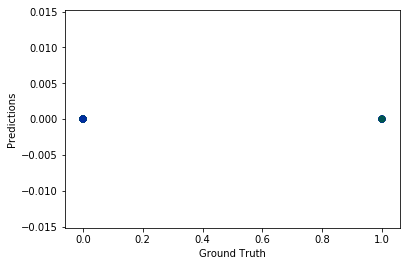

In [41]:
plt.scatter(y_test, predictionslogreg, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

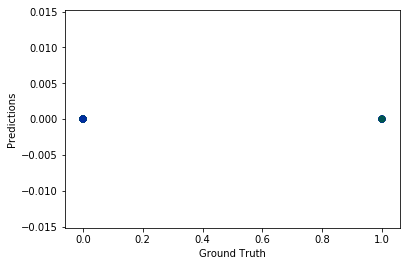

In [35]:
plt.scatter(y_test, predictionssvm, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();